<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [10]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [11]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


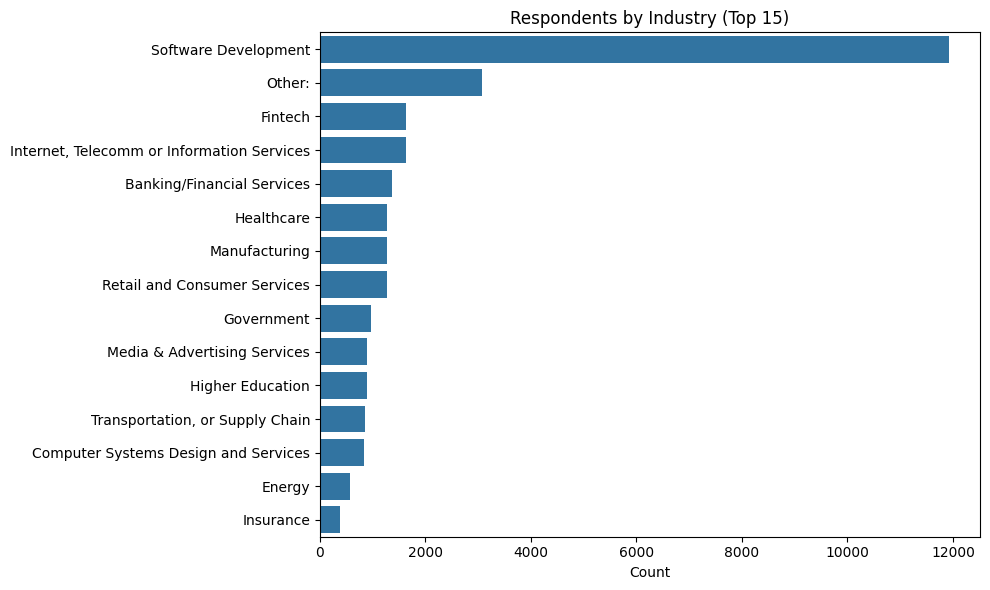

In [12]:
col_ind = "Industry"  # change if your column is named differently
counts = df[col_ind].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=counts.values, y=counts.index)
plt.title("Respondents by Industry (Top 15)")
plt.xlabel("Count"); plt.ylabel("")
plt.tight_layout(); plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


Mean: 86155.29 Median: 65000.0 Std: 186756.97
Outliers (> mean + 3*std): 89


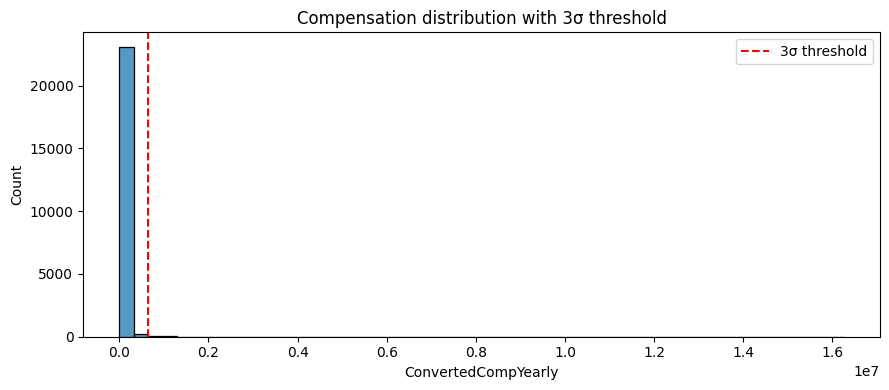

In [13]:
pay = "ConvertedCompYearly"
df[pay] = pd.to_numeric(df[pay], errors="coerce")

mu  = df[pay].mean()
sd  = df[pay].std()
thr = mu + 3*sd                   # “extremely high” = > 3 std above mean
outlier_z_mask = df[pay] > thr
print("Mean:", round(mu,2), "Median:", round(df[pay].median(),2), "Std:", round(sd,2))
print("Outliers (> mean + 3*std):", outlier_z_mask.sum())

# quick viz
plt.figure(figsize=(9,4))
sns.histplot(df[pay], bins=50)
plt.axvline(thr, color="red", linestyle="--", label="3σ threshold")
plt.title("Compensation distribution with 3σ threshold")
plt.legend(); plt.tight_layout(); plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR bounds: [-80,177, 220,861]
IQR outliers: 978


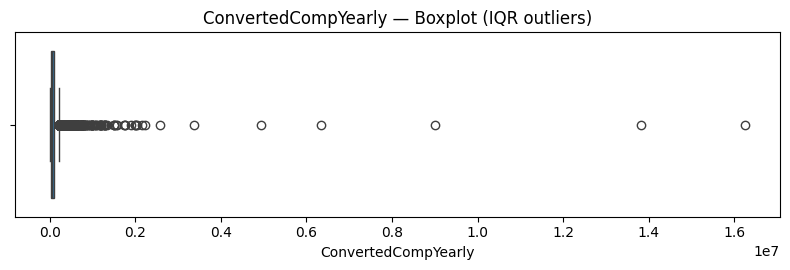

In [14]:
Q1, Q3 = df[pay].quantile([0.25, 0.75])
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR

outlier_iqr_mask = (df[pay] < low) | (df[pay] > high)
print(f"IQR bounds: [{low:,.0f}, {high:,.0f}]")
print("IQR outliers:", outlier_iqr_mask.sum())

# boxplot
plt.figure(figsize=(8,2.8))
sns.boxplot(x=df[pay], orient="h")
plt.title("ConvertedCompYearly — Boxplot (IQR outliers)")
plt.tight_layout(); plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [15]:
before = len(df)
df_no_out = df.loc[~outlier_iqr_mask].copy()
after = len(df_no_out)
print(f"Rows before: {before}  |  after removing IQR outliers: {after}  |  removed: {before-after}")
df_no_out[pay].describe()

Rows before: 65437  |  after removing IQR outliers: 64459  |  removed: 978


count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Top correlations with Age_num:


Age_num                1.000000
WorkExp                0.850866
YearsCodePro_num       0.834167
ConvertedCompYearly    0.121474
JobSat                 0.069908
CompTotal             -0.002764
JobSatPoints_1        -0.027975
ResponseId            -0.037923
JobSatPoints_8        -0.046182
JobSatPoints_6        -0.050314
JobSatPoints_4        -0.075979
JobSatPoints_9        -0.081673
JobSatPoints_7        -0.082747
JobSatPoints_5        -0.101526
JobSatPoints_11       -0.107149
Name: Age_num, dtype: float64

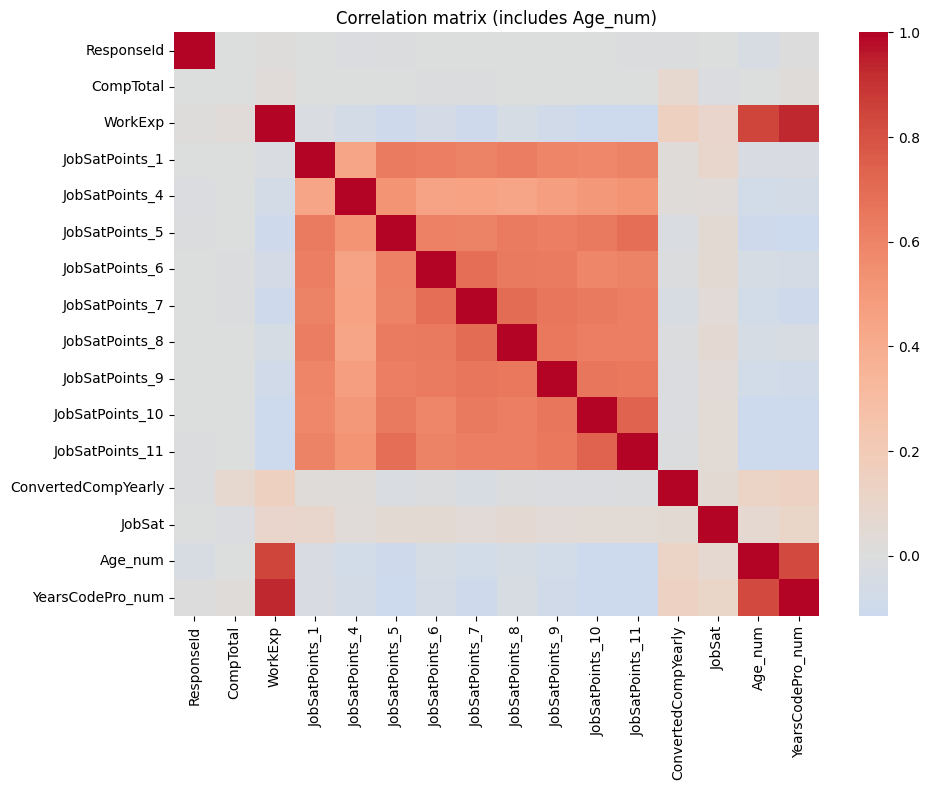

In [16]:
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df["Age_num"] = df["Age"].map(age_map)

# (optional) If YearsCodePro hasn't been made numeric yet:
def years_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith("less than"): return 0.5
    if s.startswith("more than"):
        import re
        m = re.search(r"\d+", s);  return float(m.group()) if m else np.nan
    try: return float(s)
    except: return np.nan
if "YearsCodePro" in df.columns and "YearsCodePro_num" not in df.columns:
    df["YearsCodePro_num"] = df["YearsCodePro"].apply(years_to_num)

# 2) Correlations of Age with all numeric variables
num_df = df.select_dtypes(include="number").copy()
corr = num_df.corr()

print("Top correlations with Age_num:")
display(corr["Age_num"].sort_values(ascending=False).dropna().head(15))

# 3) Visualize correlation matrix (numeric columns only; Age_num included)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation matrix (includes Age_num)")
plt.tight_layout(); plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
